Sindy's Code 

In [141]:
#dependencies 
import pandas as pd 
from pathlib import Path 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


In [142]:
#Read in file 
file = Path("Time-Wasters on Social Media.csv")
df = pd.read_csv(file)
df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


In [143]:
#Get list of countries 
countries = df["Location"].unique()
countries

array(['Pakistan', 'Mexico', 'United States', 'Barzil', 'Vietnam',
       'India', 'Indonesia', 'Philippines', 'Japan', 'Germany'],
      dtype=object)

In [144]:
#rename Brazil
df['Location'] = df['Location'].replace({'Barzil': 'Brazil'})

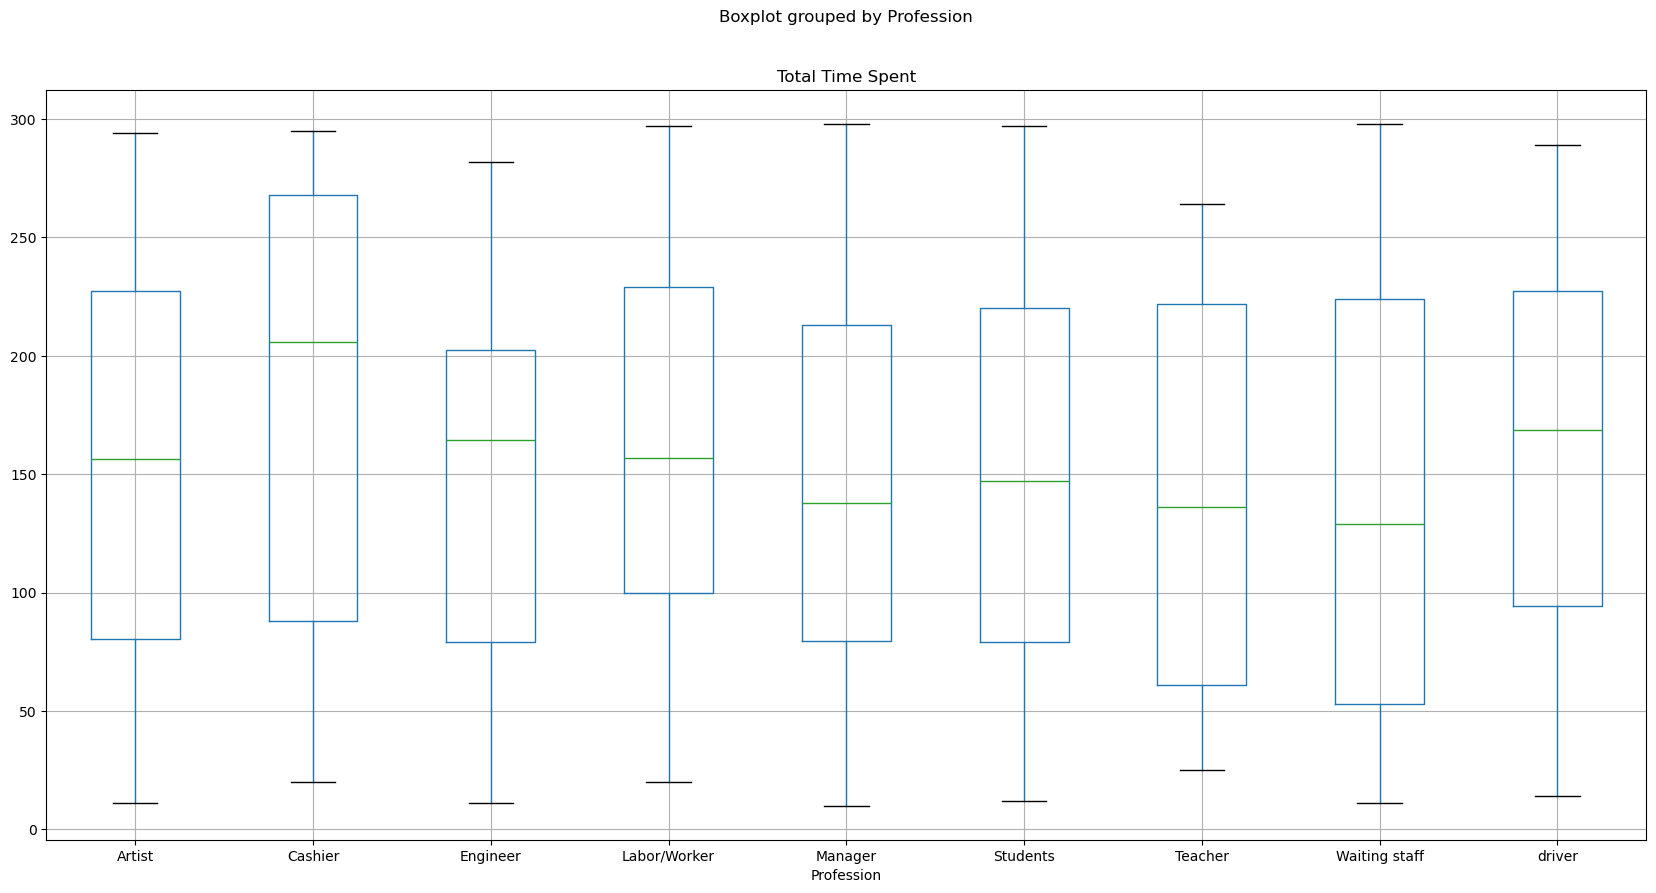

In [145]:
#only nodebt ANOVA Analysis
df_nodebt = df.loc[df["Debt"] == False, [ "Profession", "Total Time Spent"]]

df_nodebt.boxplot("Total Time Spent", by="Profession", figsize=(20, 10))

plt.savefig("q3_nodebt.png")

# Extract individual groups
group0 = df_nodebt[df_nodebt["Profession"] == "Artist"]["Total Time Spent"]
group1 = df_nodebt[df_nodebt["Profession"] == "Cashier"]["Total Time Spent"]
group2 = df_nodebt[df_nodebt["Profession"] == "Engineer"]["Total Time Spent"]
group3 = df_nodebt[df_nodebt["Profession"] == "Labor/Worker"]["Total Time Spent"]
group4 = df_nodebt[df_nodebt["Profession"] == "Manager"]["Total Time Spent"]
group5 = df_nodebt[df_nodebt["Profession"] == "Students"]["Total Time Spent"]
group6 = df_nodebt[df_nodebt["Profession"] == "Teacher"]["Total Time Spent"]
group7 = df_nodebt[df_nodebt["Profession"] == "Waiting staff"]["Total Time Spent"]
group8 = df_nodebt[df_nodebt["Profession"] == "driver"]["Total Time Spent"]

In [146]:
#ANOVA Stats for no debt group by profession 
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=0.748099334184224, pvalue=0.6489266394799178)

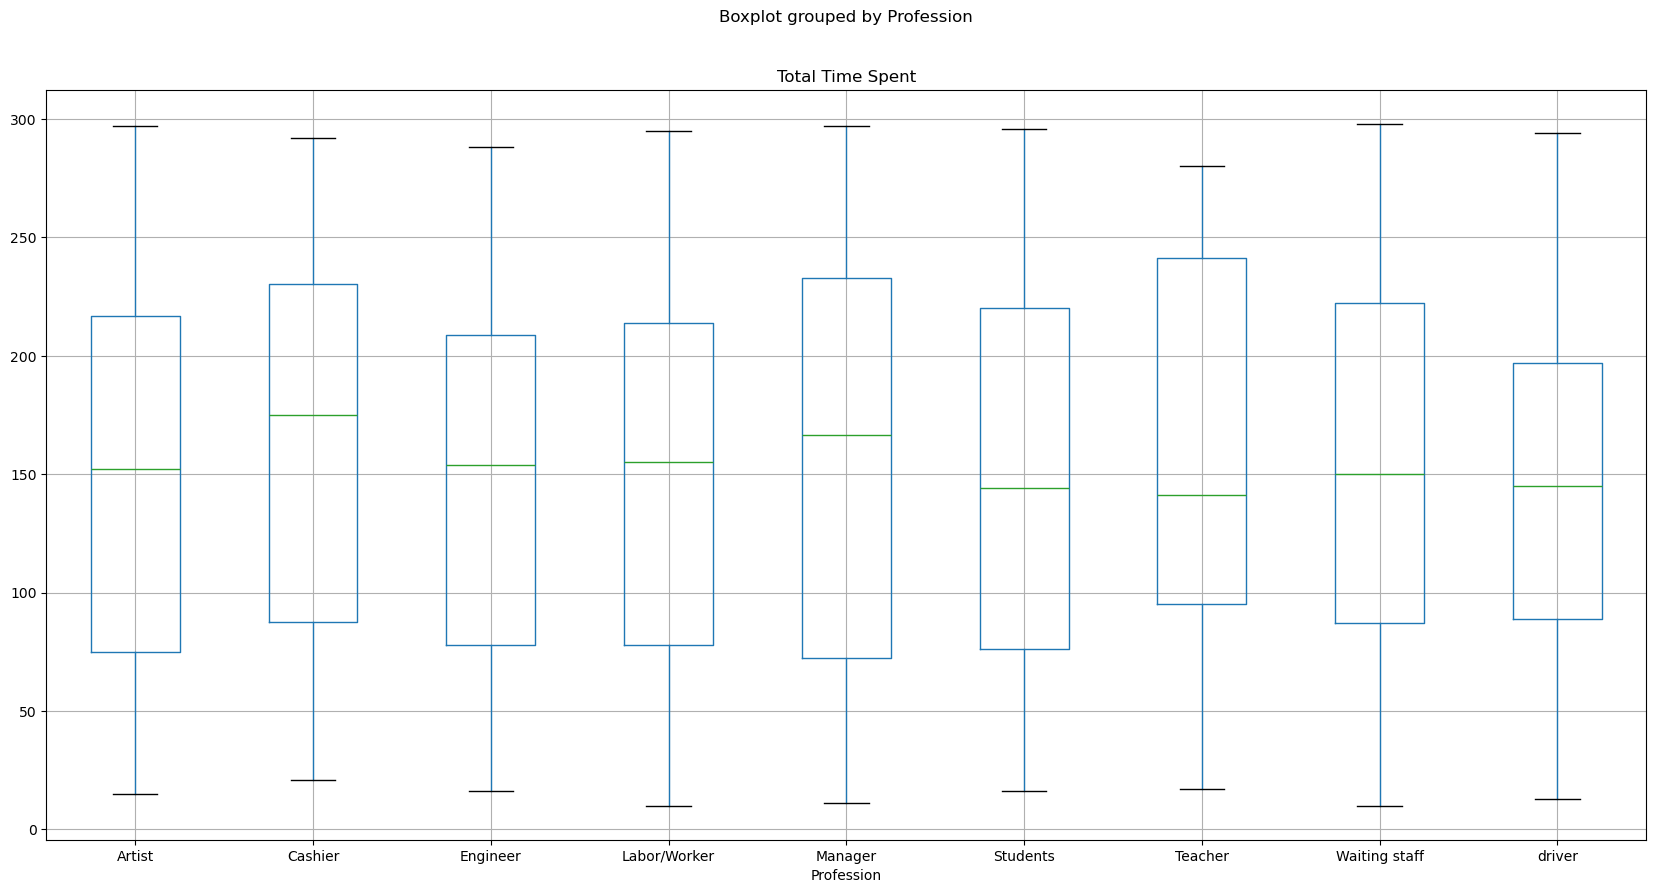

In [147]:
#only debt ANOVA Analysis
df_debt = df.loc[df["Debt"] == True, [ "Profession", "Total Time Spent"]]

df_debt.boxplot("Total Time Spent", by="Profession", figsize=(20, 10))

plt.savefig("q3_debt.png")

# Extract individual groups
group0 = df_debt[df_debt["Profession"] == "Artist"]["Total Time Spent"]
group1 = df_debt[df_debt["Profession"] == "Cashier"]["Total Time Spent"]
group2 = df_debt[df_debt["Profession"] == "Engineer"]["Total Time Spent"]
group3 = df_debt[df_debt["Profession"] == "Labor/Worker"]["Total Time Spent"]
group4 = df_debt[df_debt["Profession"] == "Manager"]["Total Time Spent"]
group5 = df_debt[df_debt["Profession"] == "Students"]["Total Time Spent"]
group6 = df_debt[df_debt["Profession"] == "Teacher"]["Total Time Spent"]
group7 = df_debt[df_debt["Profession"] == "Waiting staff"]["Total Time Spent"]
group8 = df_debt[df_debt["Profession"] == "driver"]["Total Time Spent"]

In [148]:
#ANOVA Stats for debt group by profession 
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=0.23661592812447343, pvalue=0.9839396270769452)

In [149]:
#Create dataframe for different platforms
platforms_df = pd.DataFrame(df.groupby("Platform")["Total Time Spent"].mean())
platforms_df


,Total Time Spent
Platform,
Facebook,155.180995
Instagram,146.910156
TikTok,151.271062
YouTube,152.820000


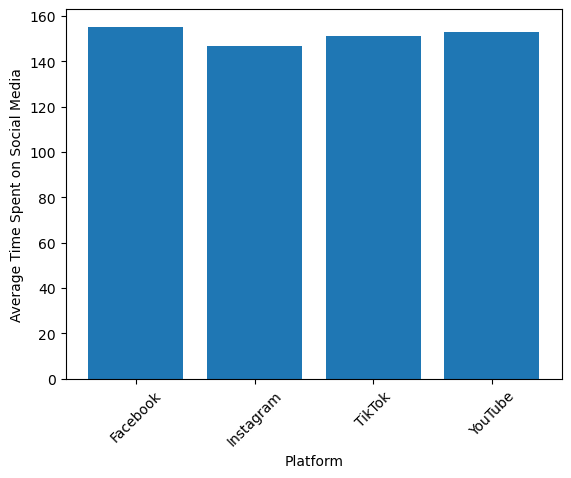

In [150]:
#Identify my variables to create bar graph for platform times 
platform_types = platforms_df.index
column_values = platforms_df["Total Time Spent"]

#Create my box plot for my platform types 
plt.bar(platform_types, column_values)
plt.xticks(rotation=45)
plt.ylabel("Average Time Spent on Social Media")
plt.xlabel("Platform")
plt.show()


In [151]:
#Bar graphs for only top 25% of top users 
max = df["Total Time Spent"].max()
min = df["Total Time Spent"].min()
print( max)
print (min)
df["Total Time Spent"].describe()

top_users = df.loc[(df["Total Time Spent"] > 223), :]
top_users = pd.DataFrame(top_users.groupby("Platform")["Total Time Spent"].mean())
top_users

298
10


,Total Time Spent
Platform,
Facebook,256.528302
Instagram,264.419355
TikTok,259.086957
YouTube,263.234375


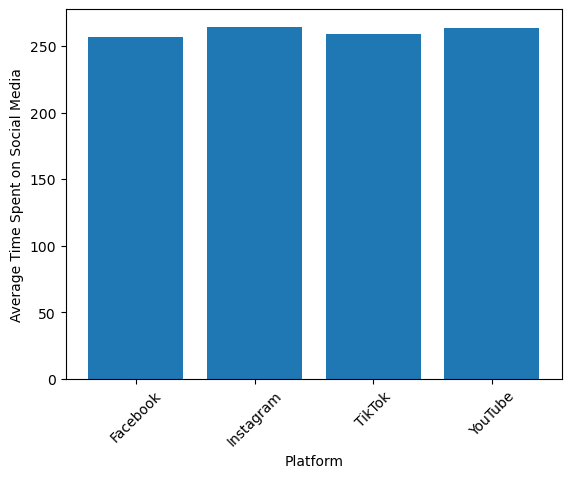

In [152]:
#Identify my variables top users
platform_types = top_users.index
column_values = top_users["Total Time Spent"]

#Create my box plot for my platform types 
plt.bar(platform_types, column_values)
plt.xticks(rotation=45)
plt.ylabel("Average Time Spent on Social Media")
plt.xlabel("Platform")
plt.show()


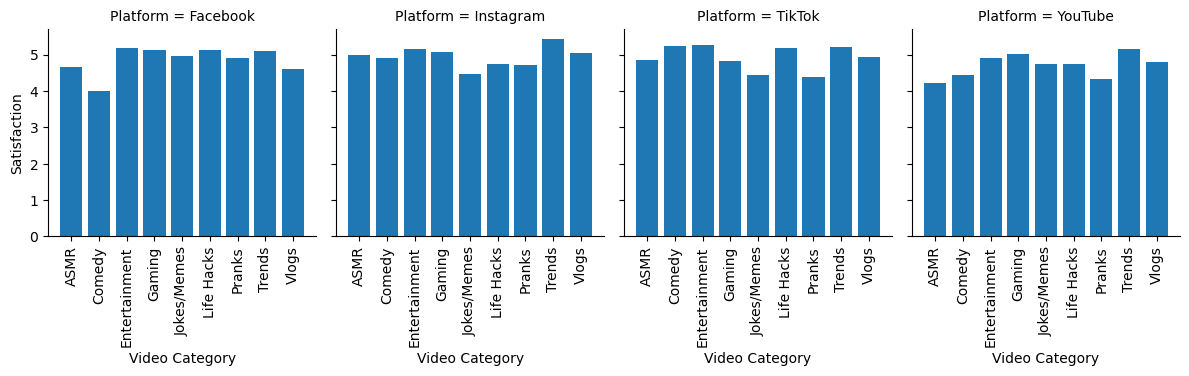

In [153]:
#Create df for platforms and satisfaction 
satisfaction_df = pd.DataFrame(df.groupby("Video Category")["Satisfaction"].mean())
satisfaction_df


satisfaction_df = pd.DataFrame(df.groupby(["Platform", "Video Category"])["Satisfaction"].mean())


satisfaction_df = satisfaction_df.reset_index()
g = sns.FacetGrid(satisfaction_df, col = "Platform", margin_titles = True)
g.map(plt.bar, "Video Category", "Satisfaction")

for ax in g.axes.flat: 
    ax.tick_params(axis='x', labelrotation=90)

   
plt.show()

In [154]:
satisfaction_df = pd.DataFrame(df.groupby(["Platform", "Age"])["Satisfaction"].mean())
satisfaction_df

Satisfaction
Platform Age              
Facebook 18       6.000000
         19       4.333333
         20       4.750000
         21       3.500000
         22       5.333333
...                    ...
YouTube  60       5.500000
         61       5.500000
         62       6.800000
         63       5.000000
         64       4.888889

[187 rows x 1 columns]

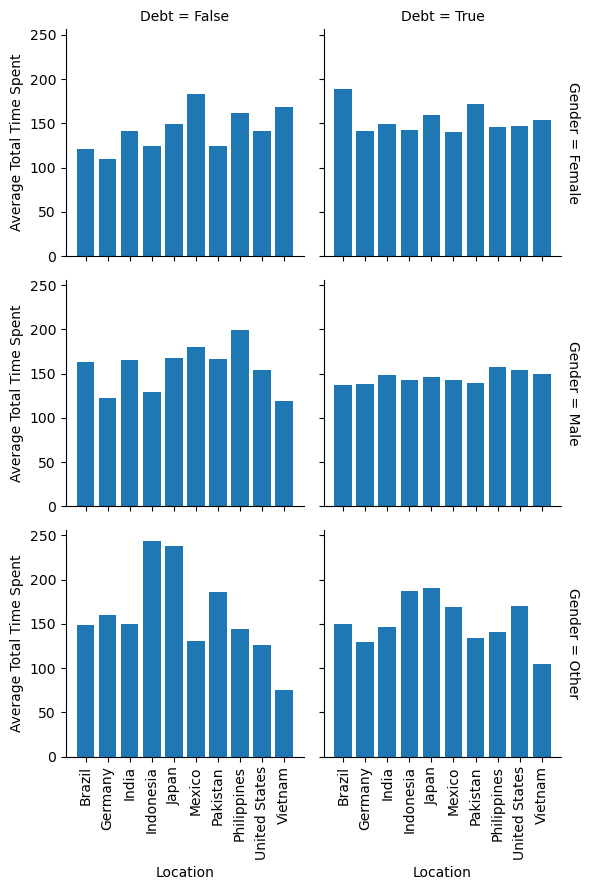

In [156]:
#creating df for question 2 total time spent
q2 = pd.DataFrame(df.groupby(["Location", "Gender", "Debt"])["Total Time Spent"].mean())
q2 = q2.rename(columns={'Total Time Spent': 'Average Total Time Spent'})

q2 = q2.reset_index()
g = sns.FacetGrid(q2, col = "Debt", row = "Gender", margin_titles = True)
g.map(plt.bar, "Location", "Average Total Time Spent")

for ax in g.axes.flat: 
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.savefig("q2_totaltimespent.png")    
plt.show()

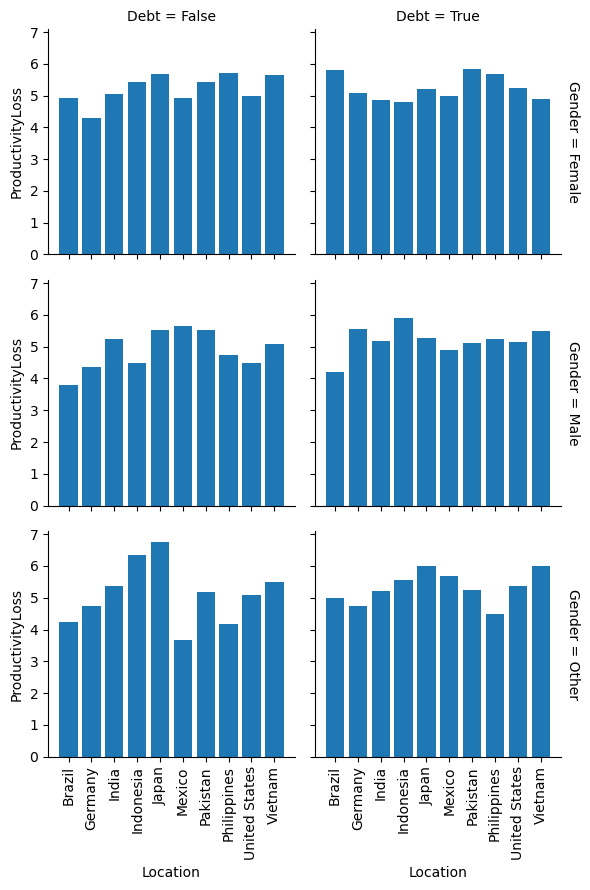

In [157]:
#creating df for question 2 productivity loss
q2_productivity = pd.DataFrame(df.groupby(["Location", "Gender", "Debt"])["ProductivityLoss"].mean())

q2_productivity = q2_productivity.reset_index()
g = sns.FacetGrid(q2_productivity, col = "Debt", row = "Gender", margin_titles = True)
g.map(plt.bar, "Location", "ProductivityLoss")

for ax in g.axes.flat: 
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.savefig("q2_productivityloss.png")    
plt.show()

In [160]:
#list of professions
profession = df["Profession"].unique()
profession 

professions_df = df.groupby("Profession").count()
professions_df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Demographics,Platform,Total Time Spent,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
Profession,,,,,,,,,,,,,,,,,,,,,
Artist,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
Cashier,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
Engineer,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
Labor/Worker,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
Manager,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
Students,246,246,246,246,246,246,246,246,246,246,...,246,246,246,246,246,246,246,246,246,246
Teacher,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
Waiting staff,194,194,194,194,194,194,194,194,194,194,...,194,194,194,194,194,194,194,194,194,194
driver,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113


In [164]:
#create data frame for data grouped by location (country) for total time spend average
q1_totaltimespent = pd.DataFrame(df.groupby("Location")["Total Time Spent"].mean())
q1_totaltimespent

,Total Time Spent
Location,
Brazil,146.153846
Germany,130.898305
India,151.162281
Indonesia,147.129870
Japan,163.666667
Mexico,160.547945
Pakistan,156.855263
Philippines,164.076923
United States,151.557471


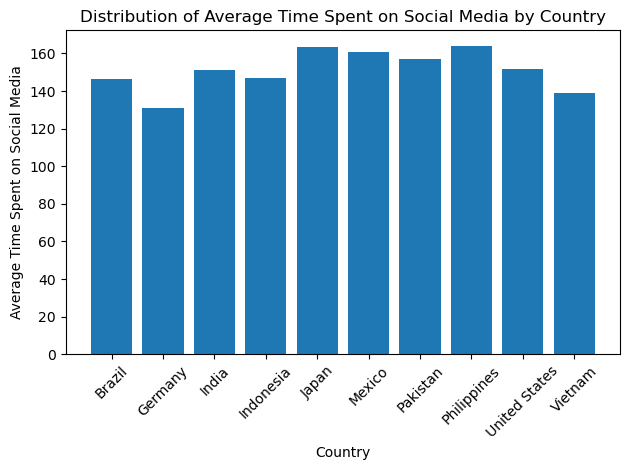

In [163]:
#question 1 total time spent 
index_values = q1_totaltimespent.index
column_values = q1_totaltimespent["Total Time Spent"]

plt.bar(index_values, column_values)
plt.xticks(rotation=45)
plt.ylabel("Average Time Spent on Social Media")
plt.xlabel("Country")
plt.title("Distribution of Average Time Spent on Social Media by Country")
plt.tight_layout()
plt.savefig("q1_totaltimespent.png")
plt.show()

In [104]:
#create data frame for data grouped by location (country) for productivity loss average 
q1_productivityloss = pd.DataFrame(df.groupby("Location")["ProductivityLoss"].mean())
q1_productivityloss

,ProductivityLoss
Location,
Brazil,4.525641
Germany,4.898305
India,5.127193
Indonesia,5.285714
Japan,5.466667
Mexico,5.109589
Pakistan,5.473684
Philippines,5.102564
United States,5.028736


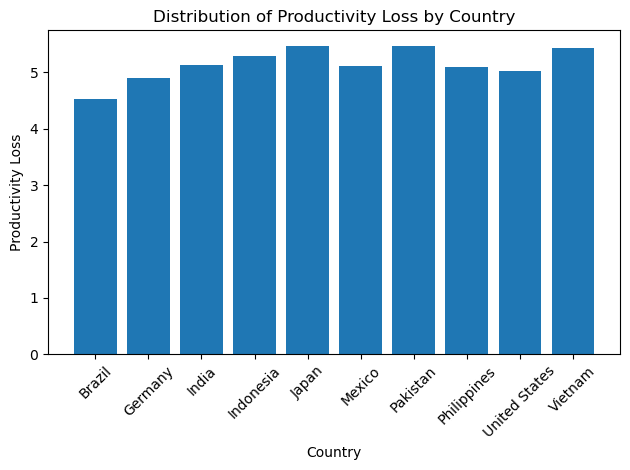

In [166]:
#question 1 productivity loss 
index_values = q1_productivityloss.index
column_values = q1_productivityloss["ProductivityLoss"]

plt.bar(index_values, column_values)
plt.xticks(rotation=45)
plt.ylabel("Productivity Loss")
plt.xlabel("Country")
plt.title("Distribution of Productivity Loss by Country")
plt.tight_layout()
plt.savefig("q1_productivityloss.png")
plt.show()

In [167]:
#Create a males only data frame
males_df = df.loc[df["Gender"] == "Male", :]
males_df


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
3,4,60,Male,Brazil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
5,6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi
6,7,56,Male,India,46201,False,False,Students,Rural,TikTok,...,8,2,Habit,Smartphone,Android,8:00 AM,10,0,At school,Wi-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,27,Male,United States,98915,True,False,Waiting staff,Urban,Instagram,...,8,2,Procrastination,Computer,iOS,10:15 PM,10,0,Commuting,Mobile Data
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


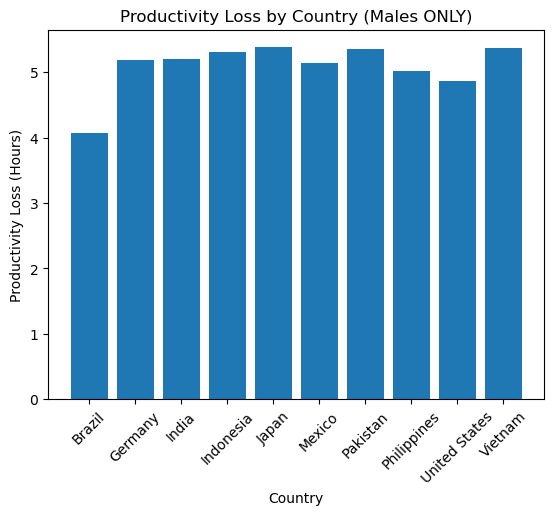

In [168]:
#Create a data frame for the productivityloss MALES
q2_productivityloss_males = pd.DataFrame(males_df.groupby("Location")["ProductivityLoss"].mean())
q2_productivityloss_males

#question 2 productivity loss 
index_values = q2_productivityloss_males.index
column_values = q2_productivityloss_males["ProductivityLoss"]

plt.bar(index_values, column_values)
plt.xticks(rotation=45)
plt.ylabel("Productivity Loss (Hours)")
plt.xlabel("Country")
plt.title ("Productivity Loss by Country (Males ONLY)")
plt.show()

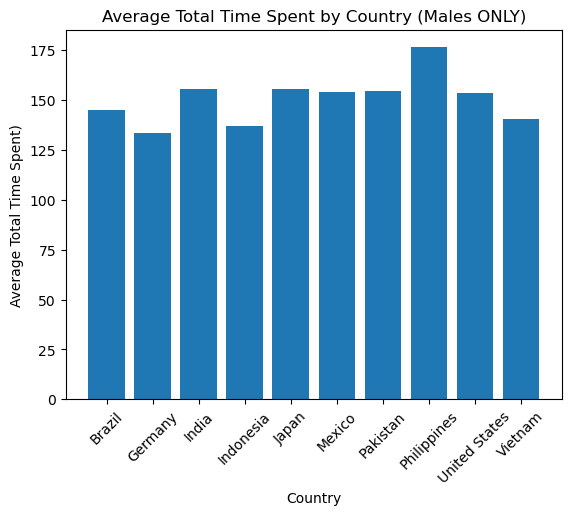

In [169]:
#Create a data frame for the Total Time Spent MALES
q2_totaltimespent_males = pd.DataFrame(males_df.groupby("Location")["Total Time Spent"].mean())
q2_totaltimespent_males

#question 2 productivity loss 
index_values = q2_totaltimespent_males.index
column_values = q2_totaltimespent_males["Total Time Spent"]

plt.bar(index_values, column_values)
plt.xticks(rotation=45)
plt.ylabel("Average Total Time Spent)")
plt.xlabel("Country")
plt.title ("Average Total Time Spent by Country (Males ONLY)")
plt.show()

In [170]:
#Create a FEMALES only data frame
females_df = df.loc[df["Gender"] == "Female", :]
females_df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
15,16,20,Female,Philippines,62821,True,True,Students,Rural,YouTube,...,6,4,Entertainment,Smartphone,MacOS,2:00 PM,8,2,At school,Mobile Data
16,17,39,Female,Mexico,33493,False,False,Waiting staff,Rural,Facebook,...,5,5,Habit,Smartphone,iOS,5:00 PM,7,3,At home,Wi-Fi
17,18,19,Female,Brazil,37069,False,False,Students,Rural,Facebook,...,6,4,Habit,Smartphone,Windows,2:00 PM,8,2,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,55,Female,Germany,69429,True,False,Students,Rural,TikTok,...,3,7,Boredom,Tablet,Android,10:15 PM,5,5,Commuting,Mobile Data
987,988,28,Female,Indonesia,66169,True,False,Artist,Urban,YouTube,...,6,4,Entertainment,Tablet,Windows,4:25 PM,8,2,Commuting,Mobile Data
990,991,60,Female,India,97240,True,True,Labor/Worker,Urban,Facebook,...,3,7,Habit,Smartphone,MacOS,5:45 PM,5,5,At home,Wi-Fi
993,994,23,Female,India,75751,True,True,Students,Urban,TikTok,...,8,2,Habit,Computer,Android,10:15 PM,10,0,Commuting,Mobile Data


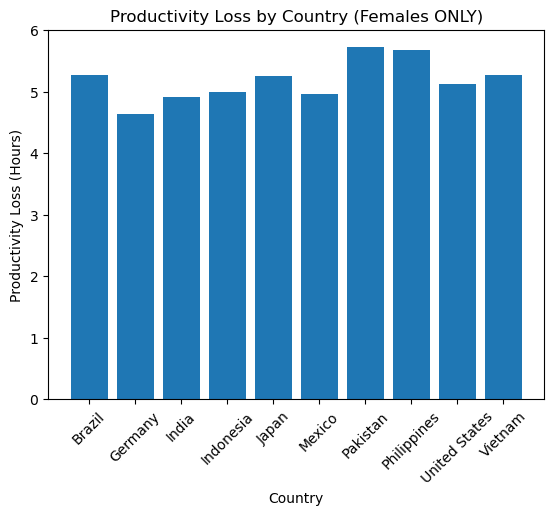

In [171]:
#Create a data frame for the productivityloss FEMALES
q2_productivityloss_females = pd.DataFrame(females_df.groupby("Location")["ProductivityLoss"].mean())
q2_productivityloss_females

#question 2 productivity loss 
index_values = q2_productivityloss_females.index
column_values = q2_productivityloss_females["ProductivityLoss"]

plt.bar(index_values, column_values)
plt.xticks(rotation=45)
plt.ylabel("Productivity Loss (Hours)")
plt.xlabel("Country")
plt.title ("Productivity Loss by Country (Females ONLY)")
plt.show()

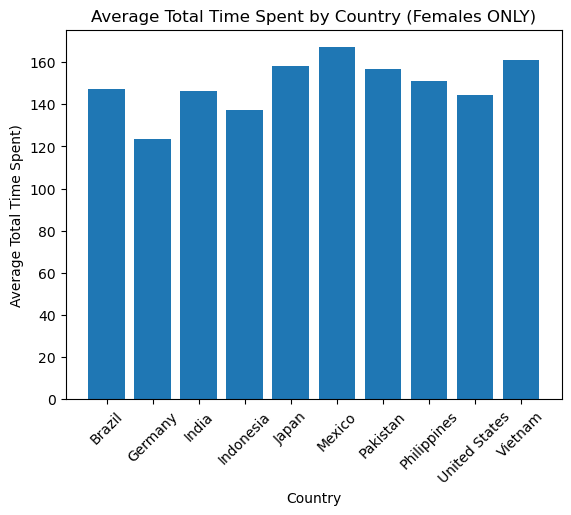

In [172]:
#Create a data frame for the Total Time Spent FEMALES
q2_totaltimespent_females = pd.DataFrame(females_df.groupby("Location")["Total Time Spent"].mean())
q2_totaltimespent_females

#question 2 productivity loss 
index_values = q2_totaltimespent_females.index
column_values = q2_totaltimespent_females["Total Time Spent"]

plt.bar(index_values, column_values)
plt.xticks(rotation=45)
plt.ylabel("Average Total Time Spent)")
plt.xlabel("Country")
plt.title ("Average Total Time Spent by Country (Females ONLY)")
plt.show()

In [173]:
#Create dataframe for other 
other_df=df.loc[df["Gender"] == "Other", :]
other_df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
9,10,28,Other,United States,35078,False,False,Students,Rural,YouTube,...,6,4,Boredom,Smartphone,iOS,2:00 PM,8,2,At home,Mobile Data
11,12,41,Other,Philippines,25105,False,False,Labor/Worker,Urban,TikTok,...,6,4,Habit,Tablet,Android,2:00 PM,8,2,At home,Wi-Fi
14,15,41,Other,Vietnam,63619,True,True,Cashier,Rural,YouTube,...,6,4,Boredom,Tablet,iOS,2:00 PM,8,2,At school,Wi-Fi
18,19,41,Other,Japan,27531,False,False,Labor/Worker,Rural,Facebook,...,6,4,Entertainment,Smartphone,iOS,2:00 PM,8,2,At work,Mobile Data
27,28,61,Other,Vietnam,21431,False,False,Manager,Urban,Instagram,...,3,7,Habit,Smartphone,iOS,9:00 PM,5,5,At home,Wi-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,959,45,Other,Vietnam,72870,True,False,Labor/Worker,Rural,YouTube,...,8,2,Boredom,Smartphone,Android,9:55 AM,10,0,At school,Mobile Data
962,963,23,Other,Vietnam,40936,False,False,Students,Urban,TikTok,...,8,2,Habit,Tablet,Android,5:45 PM,10,0,At school,Wi-Fi
971,972,61,Other,Indonesia,22204,False,True,Artist,Rural,YouTube,...,3,7,Boredom,Computer,MacOS,4:25 PM,5,5,At work,Mobile Data
986,987,54,Other,India,58458,True,True,driver,Rural,Instagram,...,8,2,Boredom,Smartphone,iOS,10:15 PM,10,0,At work,Wi-Fi


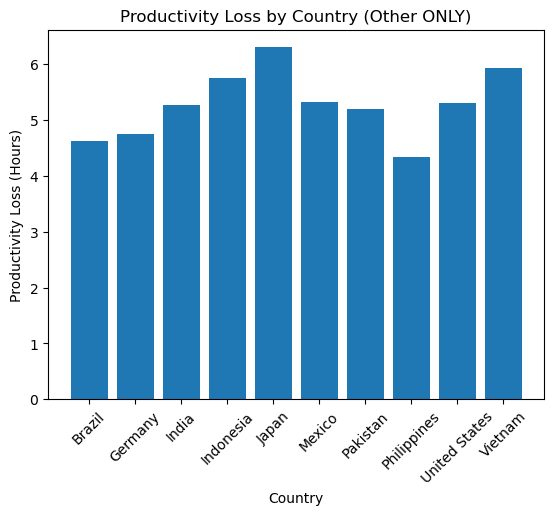

In [174]:
#Create a data frame for the productivityloss OTHER
q2_productivityloss_other = pd.DataFrame(other_df.groupby("Location")["ProductivityLoss"].mean())
q2_productivityloss_other

#question 2 productivity loss 
index_values = q2_productivityloss_other.index
column_values = q2_productivityloss_other["ProductivityLoss"]

plt.bar(index_values, column_values)
plt.xticks(rotation=45)
plt.ylabel("Productivity Loss (Hours)")
plt.xlabel("Country")
plt.title ("Productivity Loss by Country (Other ONLY)")
plt.show()

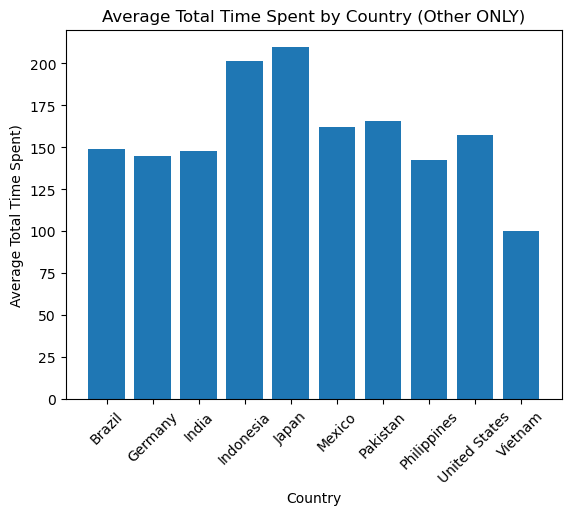

In [175]:
#Create a data frame for the Total Time Spent OTHER
q2_totaltimespent_other = pd.DataFrame(other_df.groupby("Location")["Total Time Spent"].mean())
q2_totaltimespent_other

#question 2 productivity loss 
index_values = q2_totaltimespent_other.index
column_values = q2_totaltimespent_other["Total Time Spent"]

plt.bar(index_values, column_values)
plt.xticks(rotation=45)
plt.ylabel("Average Total Time Spent)")
plt.xlabel("Country")
plt.title ("Average Total Time Spent by Country (Other ONLY)")
plt.show()

In [177]:
#create data frame for a groupby Location and Profession

professions_df = pd.DataFrame(df.groupby("Location")["Profession"].value_counts())
professions_df

count
Location Profession          
Brazil   Students          20
         Labor/Worker      18
         Waiting staff      9
         driver             9
         Engineer           6
...                       ...
Vietnam  driver             8
         Artist             4
         Cashier            4
         Engineer           4
         Teacher            2

[90 rows x 1 columns]


plot.scatter(df["Income"], df["ProductivityLoss"])
plot.show()

In [180]:
#Count how many unique countries are represented in data frame
countries = df["Location"].nunique()
countries


10

In [181]:
#grouby for profession and avereage total time spent on social media 
profession = df.groupby("Profession")["Total Time Spent"].mean()
profession 

Profession
Artist           152.978723
Cashier          170.892857
Engineer         147.076923
Labor/Worker     155.505376
Manager          152.481481
Students         148.939024
Teacher          149.025641
Waiting staff    147.530928
driver           149.168142
Name: Total Time Spent, dtype: float64

In [183]:
#list of all columns in the data sent 
df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')